In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv(r'C:\Users\HP\Downloads\creditcard.csv')

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Let us check the data types of the columns.

In [8]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Let us give it a try in understanding the dataset better. For example, my conjecture is that the class column is showing the fraudulent transactions using a binary flag. Lets check it!

In [9]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

So, apparently my conjecture was close to reality! So, it seems that we have 492 previously detected fraudulent transactions among around 290,000 transactions. Let us separate them!

In [10]:
fraud=data.loc[data['Class']==1]
normal=data.loc[data['Class']==0]

In [11]:
len(fraud)

492

Now, let us visualize a bit to get a deeper insight about the data.

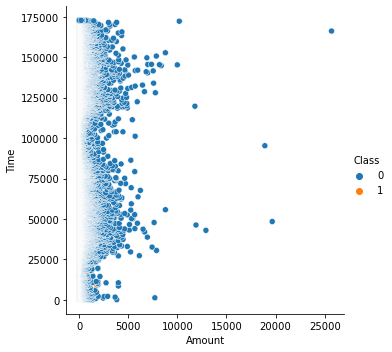

In [13]:
sns.relplot(x='Amount',y='Time',hue='Class',data=data)

Since the number of fraudulent transactions is only around 1 in every 600 transactions, we can barely see them in this plot. So, lets find another way!

Let me plot the above figure only for the fraudulent transactions.

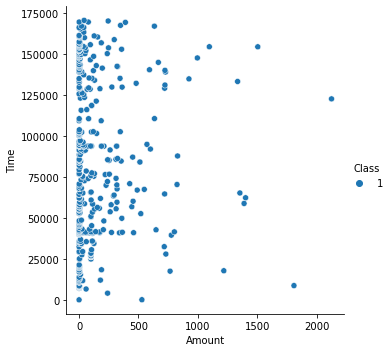

In [15]:
sns.relplot(x='Amount',y='Time',hue='Class',data=fraud)

It still appears there is no visually meaningful insights to be drawn from the figures above. But this is not end of the world! Let us try another type of diagram.

In [17]:
#I decided to cancel the following plot due to long running time on my personal computer

#sns.catplot(x='Amount',y='Time',hue='Class',data=data)

Now, let us bring in the Scikit Learn dependencies for regression.

In [19]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [23]:
X=data.iloc[:,:-1]
y=data['Class']

In [24]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Now let us use linear regression as our classifier here.

In [27]:
clf=linear_model.LogisticRegression(C=1e5)

In [30]:
clf.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0)

Now lets predict and see the performance!

In [33]:
y_predict=clf.predict(X_test)
yhat=np.array(y_test)

Let us bring in some metrics!

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [38]:
print(confusion_matrix(yhat,y_predict))

[[85255    44]
 [   40   104]]


The algorithm sounds to be quite accurate and performs well! We have only 40 and 44 false negatives and false positives out of such a large test dataset (0.3 of 290,000, whch is around 87000 transactions).

In [39]:
print(accuracy_score(yhat,y_predict))

0.9990168884519505


Wow! Not bad at all!

In [40]:
print(classification_report(yhat,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85299
           1       0.70      0.72      0.71       144

    accuracy                           1.00     85443
   macro avg       0.85      0.86      0.86     85443
weighted avg       1.00      1.00      1.00     85443



Well, as we can see here, I have to admit that we were not that super-accurate! 

Actually, here, the more important part is being successful in detection of fraudulent transactions, where the algorithm was around 71% accurate, which is not that bad, but still has room for improvement. I will probably complete this repository with attempts of other machine learning methods with hopefully higher success rates! ) 